In [54]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential                                              
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator                        
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,BatchNormalization, Dropout   

In [56]:
from file_parsing import preprocessImage, gatherImagePaths, cropImage, resizeImage, greyscaleImage

In [57]:
from pathlib import Path

source = r"J:\BIGdatasets\osu-small-animals-lila\osu-small-animals-lila\Images"
imagePaths = []
labels = []

def preprocessAndReplaceImages(source):

    for root, dirs, files in os.walk(source):

        for name in files:
            
            filePath = os.path.join(root, name)
            img = cv2.imread(filePath)
            img = cropImage(img, 0.1)
            img = resizeImage(img, 200, 200)
            img = greyscaleImage(img)
            cv2.imwrite(filePath, img)


In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,BatchNormalization, Dropout    # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator                          # type: ignore
from tensorflow.keras.models import Sequential                                               # type: ignore
from tensorflow.keras.callbacks import EarlyStopping

num_classes = 40

train_ds = tf.keras.utils.image_dataset_from_directory(

  source,
  validation_split = 0.3,
  subset = "training",
  seed = 120,
  image_size = (200, 200),
  batch_size = 32
  
)

val_ds = tf.keras.utils.image_dataset_from_directory (

  source,
  validation_split = 0.3,
  subset = "validation",
  seed = 120,
  image_size = (200, 200),
  batch_size = 32
  
)

Found 118554 files belonging to 40 classes.
Using 82988 files for training.
Found 118554 files belonging to 40 classes.
Using 35566 files for validation.


In [59]:
class_names = train_ds.class_names
print(class_names)
print(len(set(class_names)))

['American Bullfrog', 'American Mink', 'American Toad', 'Aves', 'Blanks', 'Brown Rat', "Butler's Gartersnake", 'Common Five-linked skink', "Dekay's Brownsnake", 'Eastern Chipmunk', 'Eastern Cottontail', 'Eastern Gartersnake', 'Eastern Hog-nosed snake', 'Eastern Massasauga', 'Eastern Milksnake', 'Eastern Racer Snake', 'Eastern Ribbonsnake', 'Gray Ratsnake', 'Green Frog', 'Invertebrate', "Kirtland's Snake", 'Long-tailed Weasel', 'Masked Shrew', 'Meadow Jumping Mouse', 'Meadow_Vole', 'N. Short-tailed Shrew', 'Northern Leopard Frog', 'Northern Watersnake', 'Painted Turtle', 'Plains Gartersnake', 'Raccoon', 'Red-bellied Snake', 'Smooth Greensnake', 'Snapping Turtle', 'Star-nosed mole', 'Striped Skunk', 'Virginia Opossum', 'White-footed Mouse', 'Woodchuck', 'Woodland Jumping Mouse']
40


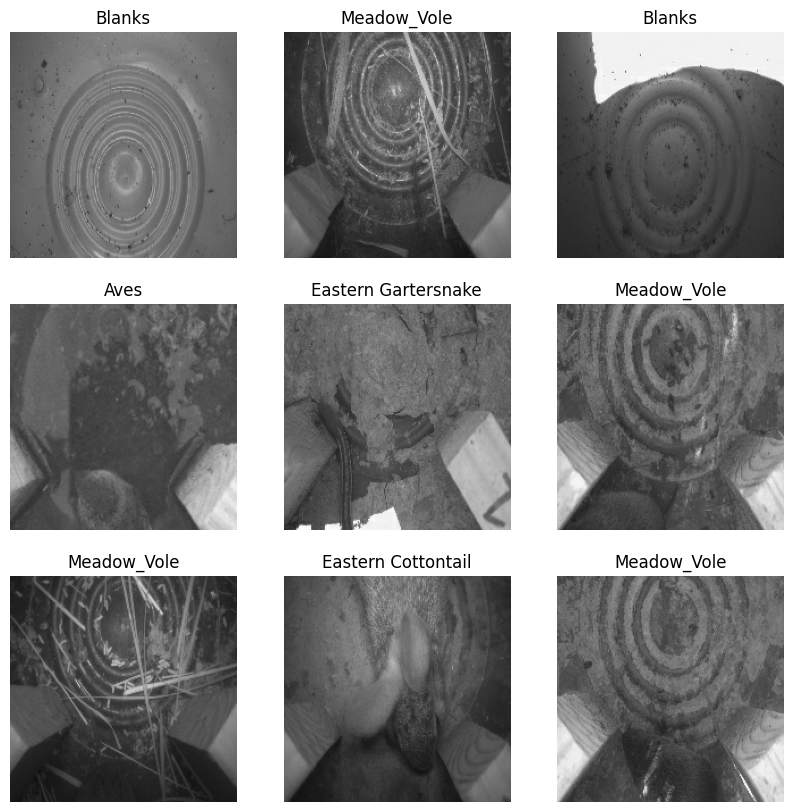

In [60]:
plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [61]:
model = tf.keras.Sequential([

  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)

])

model.compile(
    
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
  
)

history = model.fit(

    train_ds,
    validation_data = val_ds,
    epochs = 10
    
)

Epoch 1/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 1022s 394ms/step - accuracy: 0.6404 - loss: 1.2487 - val_accuracy: 0.8297 - val_loss: 0.5321
Epoch 2/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 1018s 392ms/step - accuracy: 0.8650 - loss: 0.4327 - val_accuracy: 0.8632 - val_loss: 0.4690
Epoch 3/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 1012s 390ms/step - accuracy: 0.9194 - loss: 0.2462 - val_accuracy: 0.8899 - val_loss: 0.4081
Epoch 4/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 992s 383ms/step - accuracy: 0.9481 - loss: 0.1607 - val_accuracy: 0.9050 - val_loss: 0.3739
Epoch 5/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 968s 373ms/step - accuracy: 0.9606 - loss: 0.1161 - val_accuracy: 0.9082 - val_loss: 0.3885
Epoch 6/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 967s 373ms/step - accuracy: 0.9684 - loss: 0.0944 - val_accuracy: 0.9114 - val_loss: 0.3958
Epoch 7/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 967s 373ms/step - accuracy: 0.9735 - loss: 0.0783 - val_accuracy: 0.9105 - val_loss: 0.4272
Epoch 8/10
2594/2594 ━━━━━━━━━━━━━━━━━━━━ 969s 374ms/step -

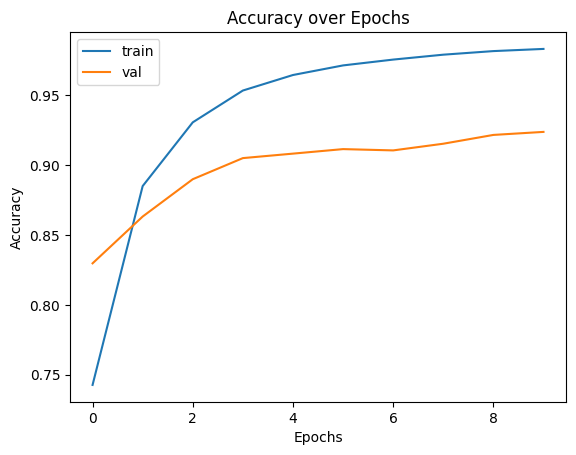

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [63]:
model.save('cameraTrapModel.keras')

In [64]:
cameraModel = tf.keras.models.load_model('cameraTrapModel.keras')
cameraModel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 198, 198, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 99, 99, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 97, 97, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,243,514 (50.52 MB)

 Trainable params: 4,414,504 (16.84 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,829,010 (33.68 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

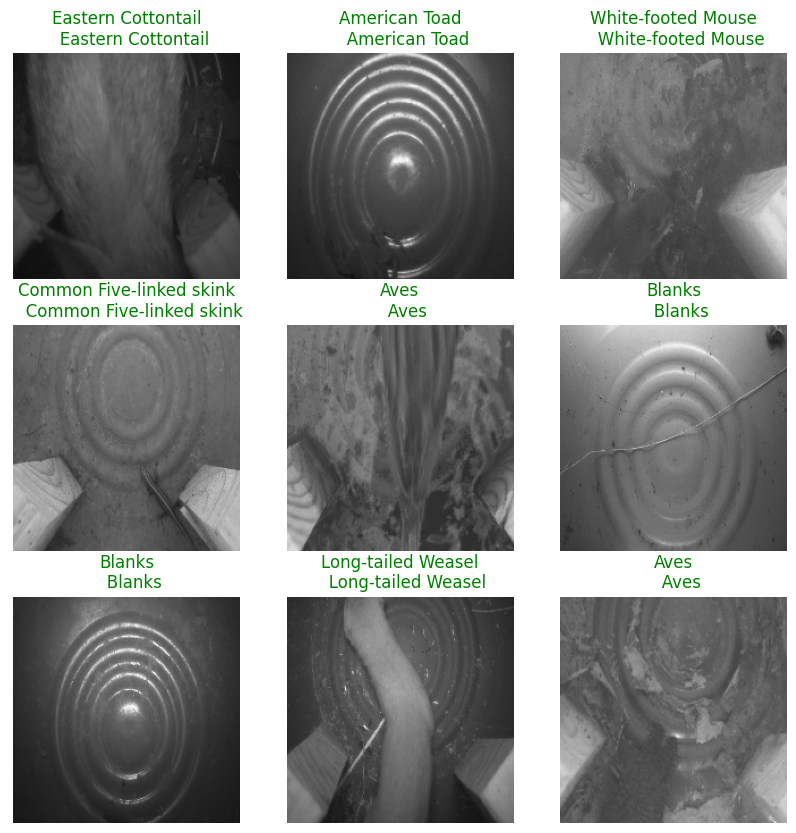

In [65]:
plt.figure(figsize = (10, 10))
for images, labels in val_ds.take(9):
    for i in range(9):

        ax = plt.subplot(3, 3, i + 1)
        predictive_image = np.expand_dims(images[i], axis = 0)
        label = cameraModel.predict(predictive_image)

        m = np.max(label)
        ind = (np.where(label == m))[1][0]

        plt.imshow(images[i].numpy().astype("uint8"))

        if (class_names[ind] != class_names[labels[i]]):

            plt.title(f'{class_names[ind]}\n   {class_names[labels[i]]}', color = "red")

        else:

            plt.title(f'{class_names[ind]}\n   {class_names[labels[i]]}', color = "green")

        plt.axis("off")